In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
orders = pd.read_csv('data/orders.csv' )
order_products_train = pd.read_csv('data/order_products__train.csv')
order_products_prior = pd.read_csv('data/order_products__prior.csv')
products = pd.read_csv('data/products.csv')
aisles = pd.read_csv('data/aisles.csv')
departments = pd.read_csv('data/departments.csv')

In [4]:
print(orders.shape)
orders.head(5)

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [5]:
orders.tail(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0
3421082,272231,206209,train,14,6,14,30.0


In [102]:
print(order_products_prior.shape)
order_products_prior.head(10)

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [101]:
print(order_products_train.shape)
order_products_train.head(10)

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [8]:
print(products.shape)
products.head(5)

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
print(aisles.shape)
aisles.head(5)

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [10]:
print(departments.shape)
departments.head(5)

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


## EDA

In [57]:
# 우선 eval_set 을 기준으로 prior, train, test의 개수를 알아보자

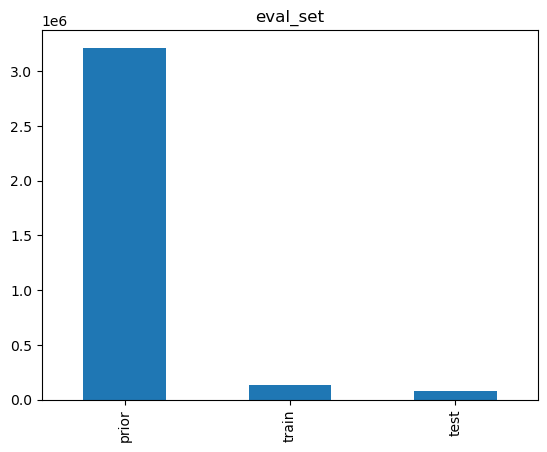

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64


In [11]:
orders_eval = orders['eval_set'].value_counts()
orders_eval.plot(kind='bar', title='eval_set')
plt.show()
print(orders_eval)

In [12]:
#구매자의 마지막 주문이 train과 test로 나누어지므로, train과 test의 값을 보면 각 구매자의 최대 구매 횟수(order_number)를 알 수 있다.
order_count = orders[(orders['eval_set']=='train')|(orders['eval_set']=='test')]
order_count

#order_count['order_number'].plot(kind='bar')
#plt.show()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
49,2196797,5,train,5,0,11,6.0
...,...,...,...,...,...,...,...
3420933,1716008,206205,train,4,1,16,10.0
3421001,1043943,206206,test,68,0,20,0.0
3421018,2821651,206207,test,17,2,13,14.0
3421068,803273,206208,test,50,5,11,4.0


In [28]:
#내림차순 정렬하기
order_count.sort_values(by='order_number', ascending=False)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2531874,2778366,152340,test,100,6,7,2.0
3078421,1682581,185641,train,100,2,12,2.0
3076273,2837266,185524,test,100,3,10,0.0
1359026,912861,81678,train,100,2,0,0.0
1179942,864328,70922,test,100,5,15,1.0
...,...,...,...,...,...,...,...
215960,1034135,13046,train,4,3,16,30.0
1167894,2025565,70208,train,4,4,13,24.0
1856454,1571988,111440,train,4,0,14,3.0
526810,1118851,31762,train,4,1,11,7.0


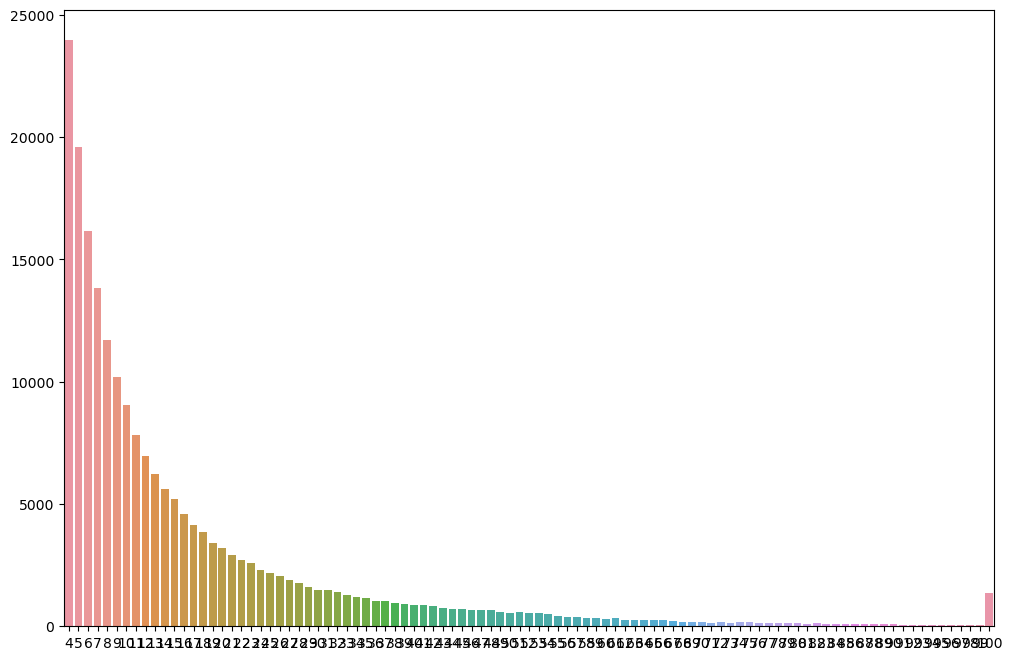

In [96]:
# 주문횟수 별 사용자 파악해보자
temp = order_count.groupby('user_id')['order_number'].agg(np.max).reset_index()
temp = temp['order_number'].value_counts()

plt.figure(figsize=(12,8))
sns.barplot(temp.index, temp.values)
plt.show()

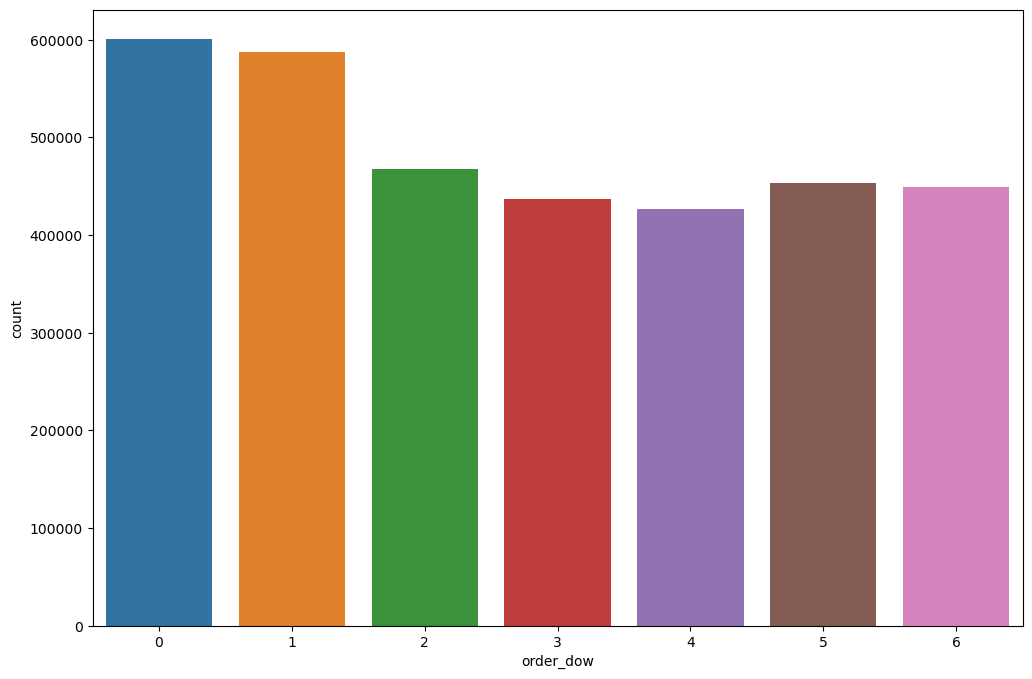

In [97]:
#요일 별 구매빈도수
plt.figure(figsize=(12,8))
sns.countplot(x='order_dow', data=orders)
plt.show()

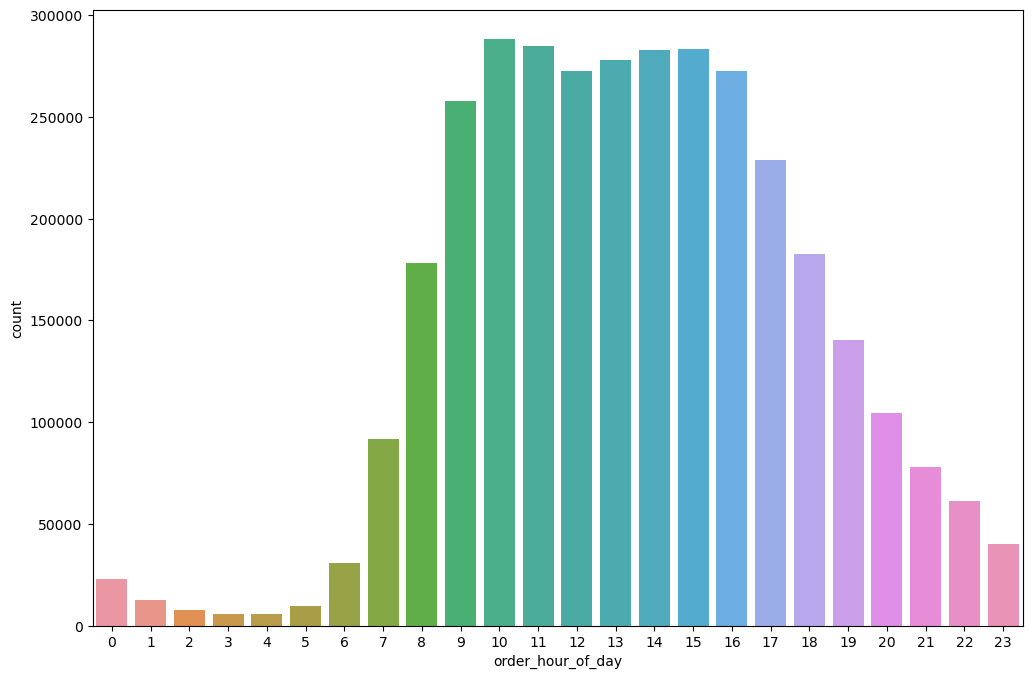

In [98]:
#시간 별 구매빈도수
plt.figure(figsize=(12,8))
sns.countplot(x='order_hour_of_day', data=orders)
plt.show()

In [100]:
orders.sort_values('order_id', ascending=True)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1868044,1,112108,train,4,4,10,9.0
3355525,2,202279,prior,3,5,9,8.0
3417191,3,205970,prior,16,5,17,12.0
2958007,4,178520,prior,36,1,9,7.0
2593373,5,156122,prior,42,6,16,9.0
...,...,...,...,...,...,...,...
1809968,3421079,108687,prior,6,1,13,0.0
877324,3421080,52726,prior,2,1,11,2.0
1949724,3421081,117076,prior,1,3,11,NaN
2903252,3421082,175185,prior,23,2,18,4.0


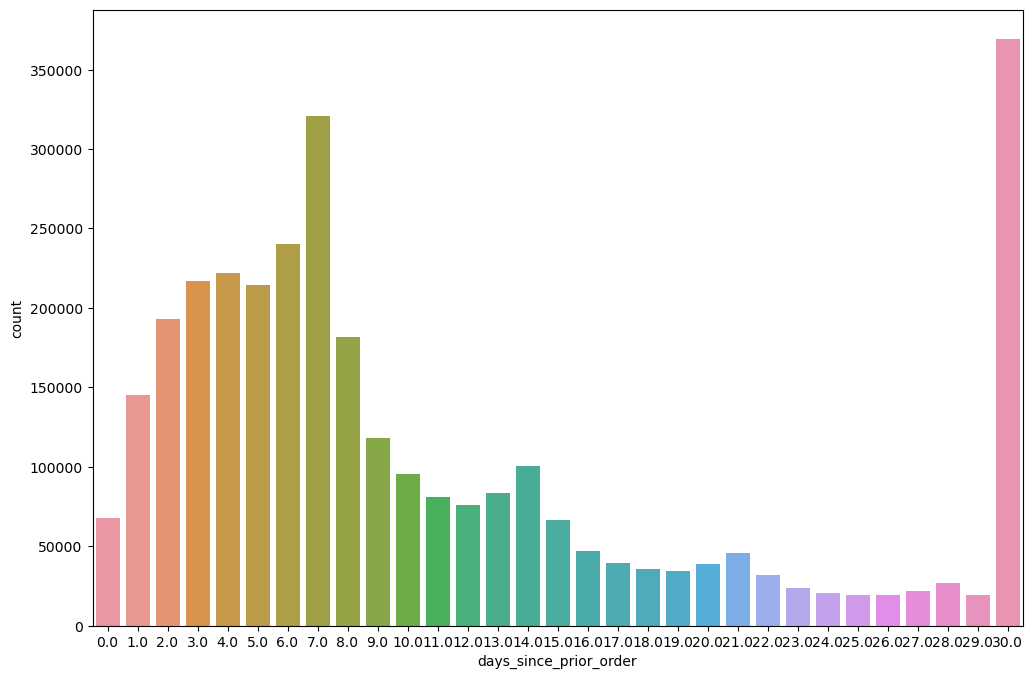

In [103]:
#재구매 날짜별 빈도수
plt.figure(figsize=(12,8))
sns.countplot(x='days_since_prior_order', data=orders)
plt.show()

In [104]:
#order_product에 해당하는 products를 추가한 후, aisles과 departments를 추가한다

order_products_prior = pd.merge(order_products_prior, products, on='product_id', how='left')
order_products_prior = pd.merge(order_products_prior, aisles, on='aisle_id', how='left')
order_products_prior = pd.merge(order_products_prior, departments, on='department_id', how='left')
order_products_train = pd.merge(order_products_train, products, on='product_id', how='left')
order_products_train = pd.merge(order_products_train, aisles, on='aisle_id', how='left')
order_products_train = pd.merge(order_products_train, departments, on='department_id', how='left')

In [105]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [106]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods


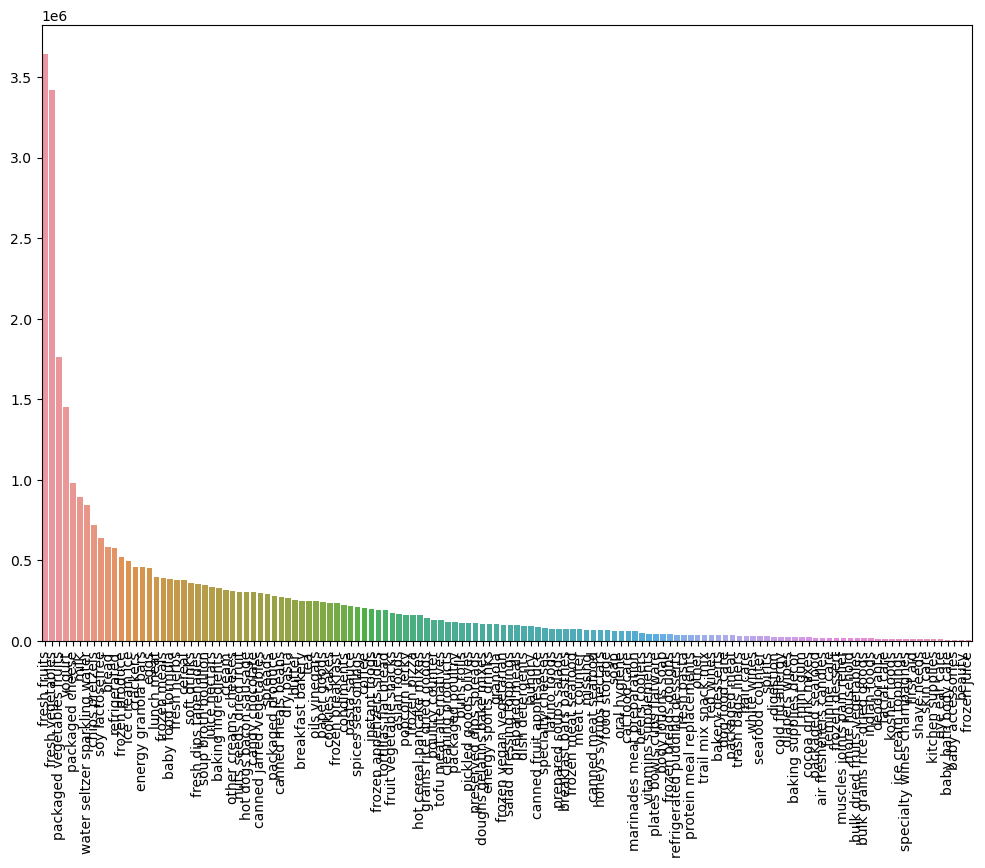

In [113]:
#prior에 대한 정보를 plot
temp = order_products_prior['aisle'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(temp.index, temp.values)
plt.xticks(rotation='vertical')
plt.show()

In [118]:
"""
plt.figure(figsize=(10,10))
temp = order_products_prior['product_name'].value_counts()
labels = (np.array(temp.index))
sizes = (np.array((temp / temp.sum())*100))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()
"""

C:\Users\tkdgu\anaconda3\envs\kaggle\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 143 (\x8f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 

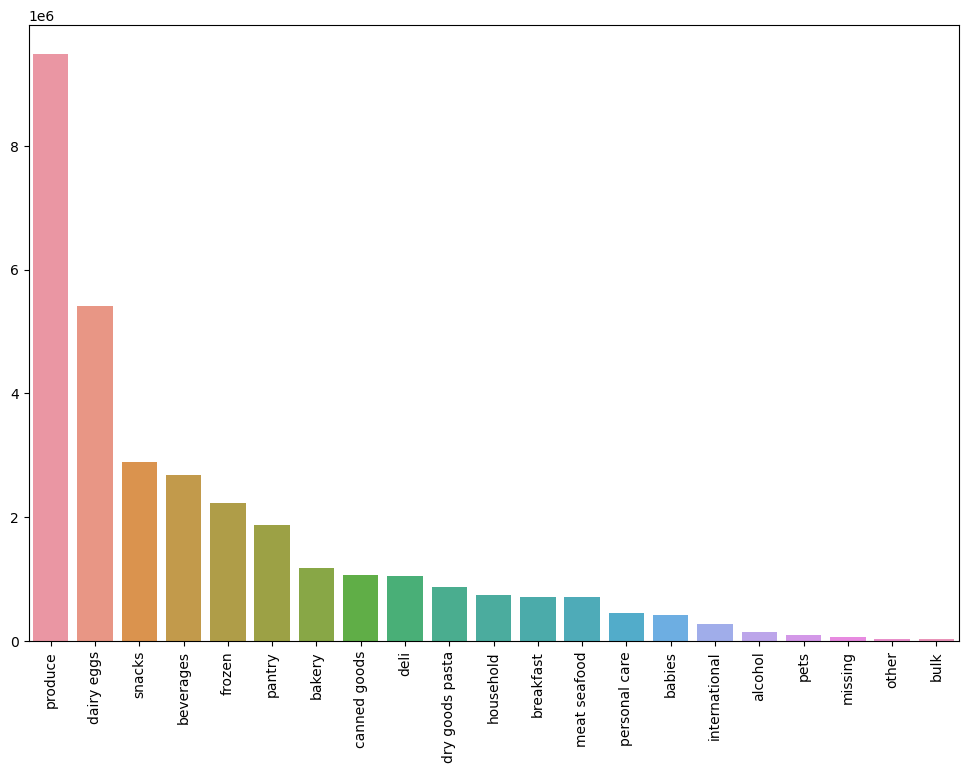

In [114]:
temp = order_products_prior['department'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(temp.index, temp.values)
plt.xticks(rotation='vertical')
plt.show()

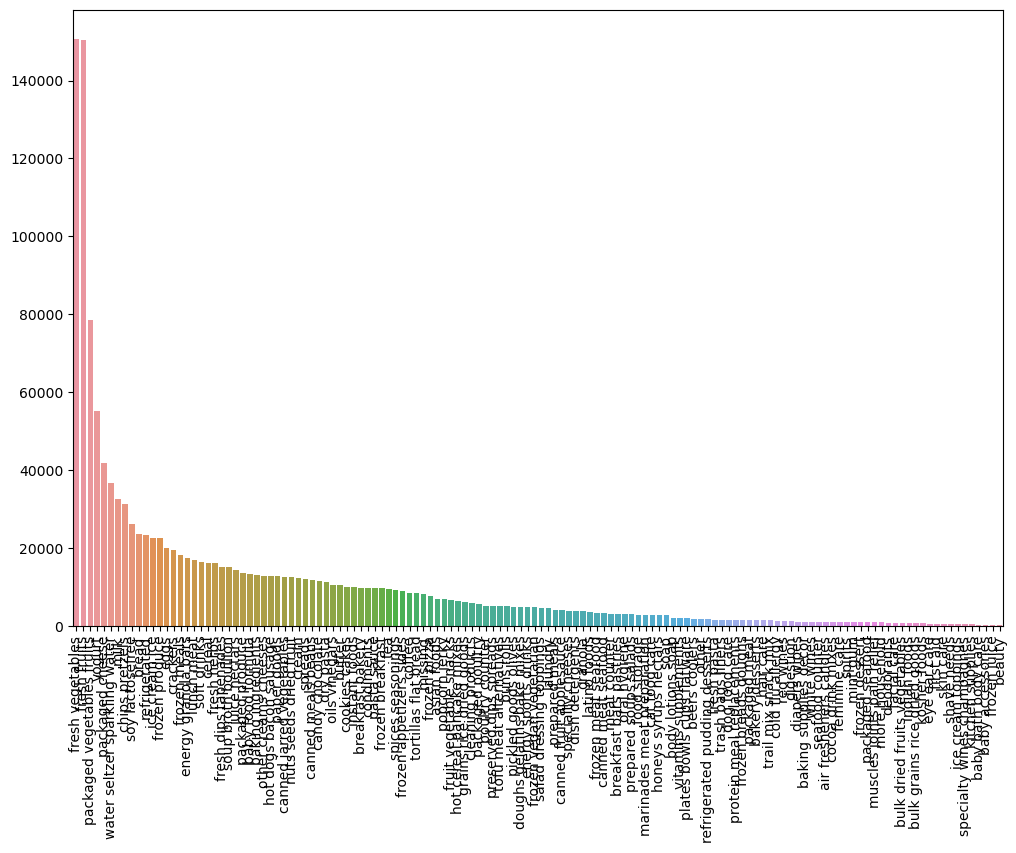

In [115]:
#train에 대해서 plot
temp = order_products_train['aisle'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(temp.index, temp.values)
plt.xticks(rotation='vertical')
plt.show()

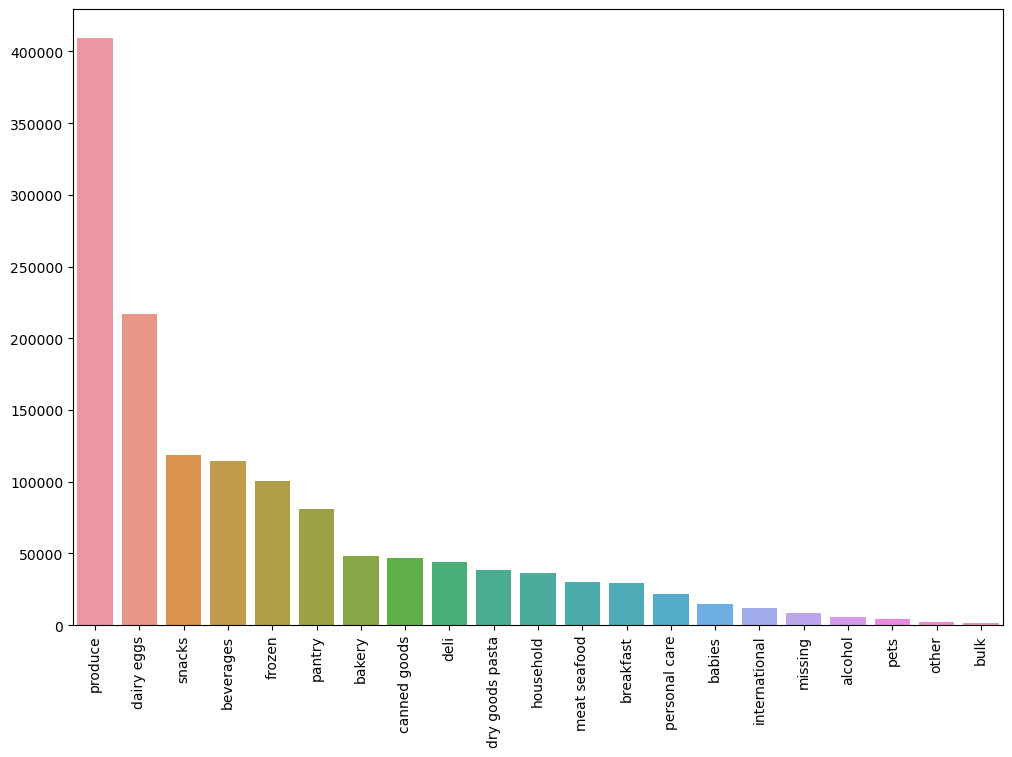

In [116]:
temp = order_products_train['department'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(temp.index, temp.values)
plt.xticks(rotation='vertical')
plt.show()